In [1]:
import numpy as np

np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [1]:
# 测试PCA
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# 载入数据

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [4]:
df.tail()

,sepal length,sepal width,petal length,petal width,label
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [9]:
# 查看数据
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]

In [10]:
class PCA():
    def __init__(self):
        pass

    def fit(self, X, n_components):
        n_samples = np.shape(X)[0]
        covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(X - X.mean(axis=0))
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvectors[idx][:n_components]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]
        X_trandformed = X.dot(eigenvectors)
        return X_trandformed

In [11]:
model = PCA()
Y = model.fit(X, 2)

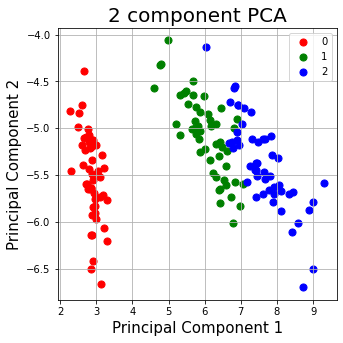

In [13]:
principalDf = pd.DataFrame(np.array(Y),
columns=['principal component 1', 'principal component 2'])
Df = pd.concat([principalDf, y], axis = 1)
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = Df['label'] == target
    ax.scatter(Df.loc[indicesToKeep, 'principal component 1']
        , Df.loc[indicesToKeep, 'principal component 2']
        , c = color
        , s = 50)
ax.legend(targets)
ax.grid()